# Emotions Detection in Text

In [1]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import os

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import mlflow
import mlflow.sklearn
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load Dataset
# df = pd.read_csv("../../data/train.csv")
base_path = os.getcwd()
df = pd.read_csv(os.path.join(base_path, '../../data', 'train.csv'), encoding='cp1252')
# Set or create an experiment
mlflow.set_experiment("emotion_detection_experiment")

<Experiment: artifact_location='file:///c:/Users/mre/Desktop/MLOps-project/notebooks/sentiments_analysis/mlruns/977451539668827688', creation_time=1733175158640, experiment_id='977451539668827688', last_update_time=1733175158640, lifecycle_stage='active', name='emotion_detection_experiment', tags={}>

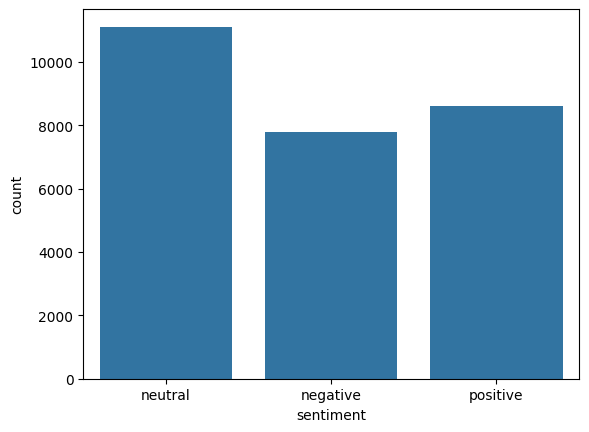

In [3]:
df.head()

# Data Exploration
sns.countplot(x='sentiment', data=df)
plt.savefig("sentiment_distribution.png")
mlflow.log_artifact("sentiment_distribution.png")

In [4]:
# Value Counts
df['sentiment'].value_counts()

sentiment
neutral     11118
positive     8600
negative     7798
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

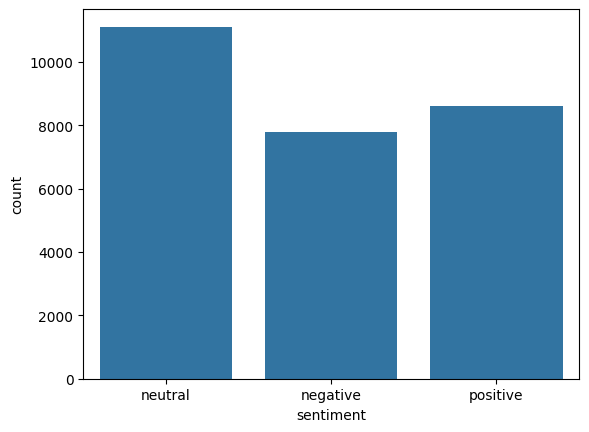

In [5]:
# Plot
sns.countplot(x='sentiment',data=df)

In [6]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [7]:
# Ensure all entries in the 'text' column are strings
df['text'] = df['text'].fillna("").astype(str)

In [8]:
# User handles
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)

In [9]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [10]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½),Clean_Text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,"I`d responded, going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,Sooo SAD miss San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,interview! leave
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,"Sons ****, couldn`t releases bought"
...,...,...,...,...,...,...,...,...,...,...,...
27511,31d4b8f6a2,Je suis en colÃ¨re car ma commande n'a pas Ã©t...,en colÃ¨re,negative,night,31-45,Canada,37742154,9984670.0,4,Je suis en colÃ¨re car commande n'a pas Ã©tÃ© ...
27512,32a8f3e7c4,Lire un bon livre ce matin m'a donnÃ© une nouv...,nouvelle perspective,positive,morning,21-30,France,65273511,547557.0,119,Lire un bon livre ce matin m'a donnÃ© une nouv...
27513,33f9d6b1e8,"Je n'ai pas bien dormi cette nuit, je suis tel...",fatiguÃ©,negative,noon,31-45,Belgique,11589623,30280.0,383,"Je n'ai pas bien dormi cette nuit, je suis tel..."
27514,34c7e4a9f2,Je suis ravi de retrouver ma famille aprÃ¨s un...,ravi,positive,evening,21-30,Suisse,8654622,41285.0,208,Je suis ravi de retrouver famille aprÃ¨s un lo...


In [11]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

# It is advisable to split before applying pipelines because it prevents data leakage.

In [12]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [13]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [14]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [15]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [16]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)
mlflow.end_run()


2024/12/04 21:16:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged model with accuracy: 0.69


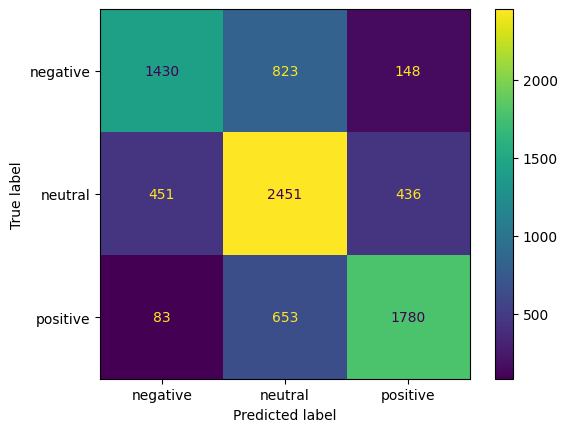

In [20]:
# Start an MLflow run
with mlflow.start_run():
    # Train the model
    pipe_lr.fit(x_train, y_train)

    # Log model-related parameters
    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_param("vectorizer", "CountVectorizer")
    mlflow.log_param("train_test_split", "70:30")
    mlflow.log_param("vocab_size", len(pipe_lr['cv'].vocabulary_))
    mlflow.log_param("max_iter", pipe_lr['lr'].max_iter)
    mlflow.log_param("solver", pipe_lr['lr'].solver)

    # Evaluate the model
    predictions = pipe_lr.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Log confusion matrix as an artifact
    cm_display = ConfusionMatrixDisplay.from_estimator(pipe_lr, x_test, y_test)
    cm_display.figure_.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Save cleaned dataset as an artifact
    df.to_csv("cleaned_dataset.csv", index=False)
    mlflow.log_artifact("cleaned_dataset.csv")

    # Log the model to MLflow
    mlflow.sklearn.log_model(pipe_lr, artifact_path="emotion_classifier_pipe_lr")

    # Optionally, save the model locally and log it as an artifact
    model_filepath = "models/emotion_classifier_pipe_lr.pkl"
    os.makedirs(os.path.dirname(model_filepath), exist_ok=True)
    joblib.dump(pipe_lr, model_filepath)
    mlflow.log_artifact(model_filepath)

    print(f"Logged model with accuracy: {accuracy:.2f}")
mlflow.end_run()

In [21]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [22]:
test_prediction = pipe_lr.predict([ex1])

In [23]:
y_true = ["positive"]
accuracy = accuracy_score(y_true, test_prediction)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


In [24]:
# Prediction Prob
proba = pipe_lr.predict_proba([ex1])
# Log prediction probabilities
mlflow.log_metric("avg_prediction_confidence", np.max(proba))

In [25]:
# To Know the classes
pipe_lr.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [26]:
# Save Model & Pipeline
import joblib
# Define the file path
file_path = "../../src/models/emotion_classifier_pipe_lr.pkl"

# Create the directories if they do not exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the model
with open(file_path, "wb") as pipeline_file:
    joblib.dump(pipe_lr, pipeline_file)